# №8.0
Определить устойчивость следящей системы, используя частотные логарифмические характеристики, если задана передаточная функция для разомкнутого состояния:
$$W(s) = \frac{k}{s(1 + T_1s)(1 + T_2s)}$$
и параметры имеют значения $k = 50~\frac{1}{с},~T_1 = 0.04~c,~T_2 = 0.01~c$. Если ситема устойчива, определить запас устойчивости по амплитуде и по фазе.

In [1]:
import numpy, matplotlib.pyplot # Подключаем модули расширенной работы с математикой и построения графиков

T1 = 0.04; T2 = 0.01; k = 50

def W(s):
    return k / (s * (T1*s + 1) * (T2*s + 1))

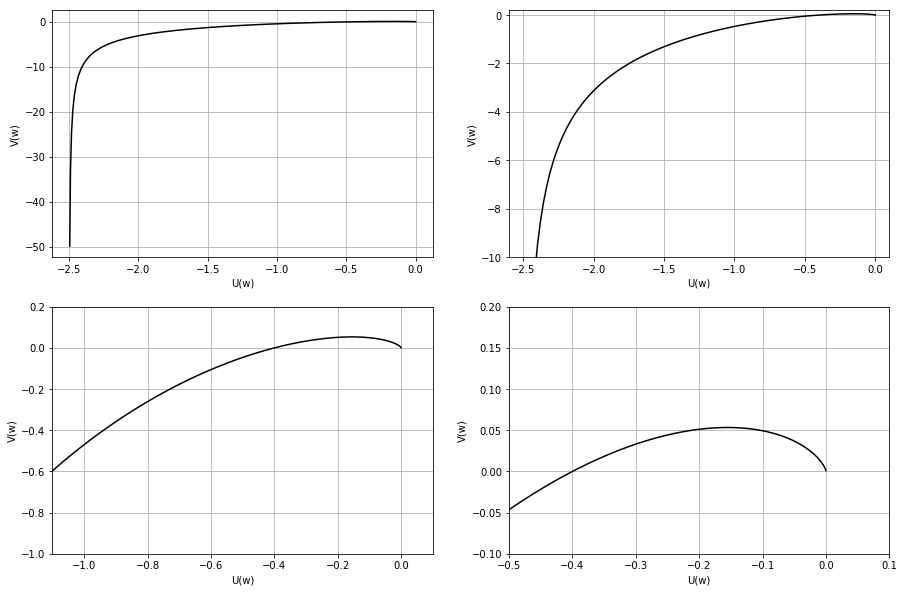

In [2]:
a = numpy.array([W(1j*omega) for omega in numpy.arange(1, 500, 0.5)]) # массив точек для годографа Найквиста

matplotlib.pyplot.figure(figsize=(15, 10))

matplotlib.pyplot.subplot(221)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis('tight')
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.subplot(222)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-2.6, 0.1, -10, 0.2])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.subplot(223)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-1.1, 0.1, -1, 0.2])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.subplot(224)
matplotlib.pyplot.plot(a.real, a.imag, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-0.5, 0.1, -0.1, 0.2])
matplotlib.pyplot.xlabel('U(w)')
matplotlib.pyplot.ylabel('V(w)')

matplotlib.pyplot.show()

Частотные логарифмические характеристики:

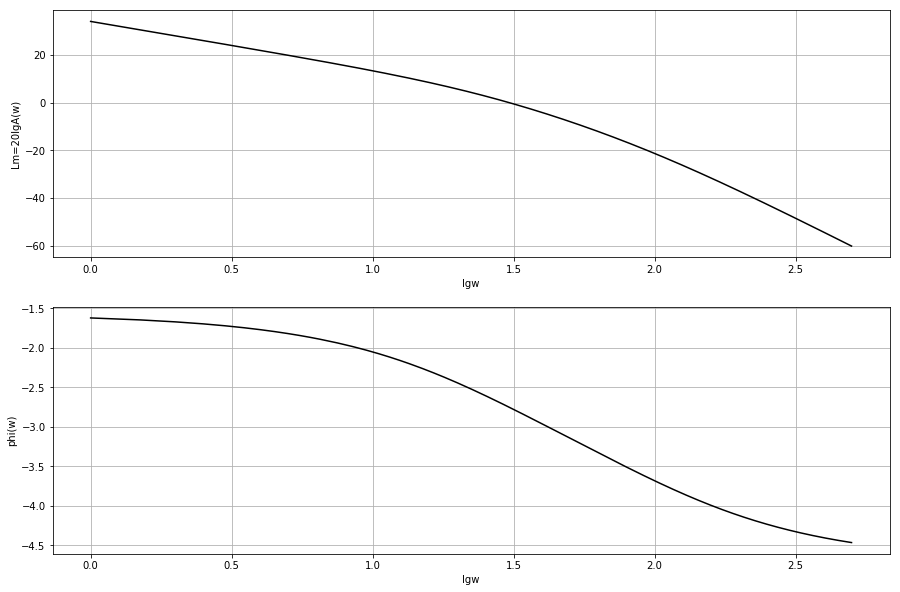

In [3]:
matplotlib.pyplot.figure(figsize=(15, 10))

matplotlib.pyplot.subplot(211)
matplotlib.pyplot.plot(numpy.log10(numpy.arange(1, 500, 0.5)), 20*numpy.log10(numpy.abs(a)), 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.xlabel('lgw')
matplotlib.pyplot.ylabel('Lm=20lgA(w)')

matplotlib.pyplot.subplot(212)
phi = numpy.array([angle - (2*numpy.pi if (angle > 0) else 0) for angle in numpy.angle(a)])
matplotlib.pyplot.plot(numpy.log10(numpy.arange(1, 500, 0.5)), phi, 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.xlabel('lgw')
matplotlib.pyplot.ylabel('phi(w)')

matplotlib.pyplot.show()

По критерию Найквиста, **система устойчива.** Видно, что АФХ *пересекает* вещественную ось в одной точке. Найдем корень $\omega_0 \ne \infty$ уравнения $\Im{W(i\omega)}=0$. 

In [4]:
def derivative(function, x, augmentation):
    return (function(x + augmentation) - function(x))/augmentation

def newton(function, x, accuracy, augmentation):
    while abs(function(x)) > accuracy:
        x = x - function(x)/derivative(function, x, augmentation)
    return x

In [5]:
omega0 = newton(lambda omega: W(1j*omega).imag, 1,  0.000001, 0.01)
print(omega0)

49.99999306013461


Видно, что $\omega_0 = 50$:

In [6]:
print(W(50j).imag) # ImW(50)
omega0 = 50

-0.0


Запас устойчивости по амплитуде равен $1 - |W(i\omega_0)|$

In [7]:
print(1 - numpy.abs(W(1j*omega0)))

0.6


Запас устойчивости по фазе равен $\pi + \arg{W(i\omega_2)}$, $\omega_2$ найдем из уравнения $|W(i\omega_2)| = 1$

In [8]:
omega2 = newton(lambda omega: numpy.abs(W(1j*omega)) - 1, 1,  0.00001, 0.01)
print(omega2)

30.3914354771


Запас устойчивости по фазе равен:

In [9]:
print(numpy.pi + numpy.angle(W(1j*omega2)))

0.393326357216
